In [12]:
import pandas as pd
from moviepy.editor import VideoFileClip
import glob
import os
from scipy import linalg
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

def video_score(json_data):
    video_final = pd.melt(pd.read_json(json_data, lines=True))
    video_final.rename(columns={"variable": "VideoID"}, inplace=True)
    return video_final


# 1. Effective: score ranges from "1" to "5", with "5" being "most effective"

video_Effective_final = video_score("./video_Effective_clean.json").rename(
    columns={"value": "Video_Effective_Score"}
)
print(video_Effective_final)


# 2. Exciting

video_Exciting_final = video_score("./video_Exciting_clean.json").rename(
    columns={"value": "Video_Exciting_Score"}
)
print(video_Exciting_final)

# 3. Funny

video_Funny_final = video_score("./video_Funny_clean.json").rename(
    columns={"value": "Video_Funny_Score"}
)
print(video_Funny_final)

# 4. Sentiments

video_Sentiments_final = video_score("./video_Sentiments_clean.json").rename(
    columns={"value": "Video_Sentiments_Score"}
)
print(video_Sentiments_final)


Sentiments_list = pd.read_csv(
    "./Sentiments_List.txt",
    sep=" ",
    header=None,
    names=[
        "Video_Sentiments_Score",
        "Sentiments_List_ID",
        "Sentiments_List",
        "Sentiments_Abb",
    ],
    encoding="unicode_escape",
)

Sentiments_list.drop("Sentiments_List", axis=1, inplace=True)
Sentiments_list["Sentiments_Abb"] = Sentiments_list["Sentiments_Abb"].str.replace(
    ")", ""
)
video_Sentiments_final = video_Sentiments_final.merge(
    Sentiments_list, on="Video_Sentiments_Score", how="outer"
)
video_Sentiments_final.to_csv("./video_Sentiments_final.csv", index=False)

# combine all the scores into one

video_final =pd.merge(pd.merge(pd.merge(video_Effective_final,video_Exciting_final,on='VideoID',how='outer'),video_Funny_final,on='VideoID',how='outer'),video_Sentiments_final,on='VideoID',how='outer')
print(video_final)

          VideoID  Video_Effective_Score
0     KONL05sae4E                      2
1     VZ9lXgcYL50                      5
2     Pzl86IjTpHI                      5
3     XutXCTwwmYc                      2
4     h6CcxJQq1x8                      5
...           ...                    ...
3472  JYu3LjgnT9s                      2
3473  m064aD_kH40                      3
3474  UTjDWkaR6ZQ                      1
3475  hIqC9IYMUOU                      5
3476  D5H1A7-6E_U                      3

[3477 rows x 2 columns]
          VideoID  Video_Exciting_Score
0     KONL05sae4E                   1.0
1     VZ9lXgcYL50                   0.6
2     Pzl86IjTpHI                   0.6
3     XutXCTwwmYc                   1.0
4     h6CcxJQq1x8                   0.6
...           ...                   ...
3472  JYu3LjgnT9s                   0.8
3473  m064aD_kH40                   0.8
3474  UTjDWkaR6ZQ                   0.2
3475  hIqC9IYMUOU                   0.8
3476  D5H1A7-6E_U                   0.4

[3

In [ ]:
def with_moviepy(filename):
    clip = VideoFileClip(filename)
    duration       = clip.duration
    fps            = clip.fps
    width, height  = clip.size
    return duration, fps, (width, height)
    
startdir = "/project/Video_allad"
all_files = []
for root,dirs,files in os.walk(startdir):
    for file in files:
        if file.endswith(".mp4"):
            all_files.append(os.path.join(root,file))

with open('video_file_name.pkl', 'wb') as f:
    pickle.dump(all_files, f)
    
length_video=[]
for f in all_files:
    from moviepy.editor import VideoFileClip
    clip = VideoFileClip(f)
    duration = clip.duration
    length_video.extend([f,duration])

with open('video_length.pkl', 'wb') as f:
    pickle.dump(length_video, f)
    
with open('video_file_name.pkl', 'rb') as f:
    all_files = pickle.load(f)
with open('video_length.pkl', 'rb') as f:
    length_video = pickle.load(f)

In [5]:
listvalue = length_video[1::2] # Elements from list1 starting from 1 iterating by 2
listname = length_video[::2] # Elements from list1 starting from 0 iterating by 2
print(listname)

['/project/Video_allad/Amazon Echo - #BaldwinBowl Party feat Alec Baldwin, Dan Marino, Jason Schwartzman, & Missy Elliott-qTz5jAn-XX8.mp4', '/project/Video_allad/Cadbury Dairy Milk Tastes Like This Feels-Dd_GSSQQGNY.mp4', '/project/Video_allad/AMG Christmas 2012-QSgnWYlUtj4.mp4', '/project/Video_allad/Reebok Z Jet Running Shoes-z1rCMzkbhmc.mp4', '/project/Video_allad/Fortune Cookie Maker-brq5oJFIKJ0.mp4', '/project/Video_allad/Goodknight Advanced Activ+ Ad - Push Karo Khush Raho!-F0ZSXQCXX1A.mp4', '/project/Video_allad/BULLET - THE EXECUTION-Gw_a4iutD1Q.mp4', '/project/Video_allad/Anti-Bullying ad-nWJut7KQhI4.mp4', "/project/Video_allad/Visit Seattle _ Alsidneio's First Take _  -15 Trailer-eWHF6rmt1WE.mp4", '/project/Video_allad/Retro Commercial - Radio Shack Cell Phones - 1990-694TX2lQ7Uo.mp4', '/project/Video_allad/PGATOUR.COM My Buddy - Jordan Spieth-psmD1DVPIrU.mp4', '/project/Video_allad/Mahindra NuvoSport TV Ad (Hindi)-6xy_lt-Z5b0.mp4', '/project/Video_allad/60 Seconds in the Red

In [6]:
# get the video ids in a list
x = []
for i in listname:
    x.append(i[-15:-4])
print(x)

['qTz5jAn-XX8', 'Dd_GSSQQGNY', 'QSgnWYlUtj4', 'z1rCMzkbhmc', 'brq5oJFIKJ0', 'F0ZSXQCXX1A', 'Gw_a4iutD1Q', 'nWJut7KQhI4', 'eWHF6rmt1WE', '694TX2lQ7Uo', 'psmD1DVPIrU', '6xy_lt-Z5b0', 'NWug8UKCZxo', 'W5N5Hlt7B2M', '2S2VUCdbhg0', 'iHwdQdwc_Tk', 'rUFnH7KYMFE', 'sRzh8uLA1tM', 'T36fK0A8ByI', 'zeArvKw2Y-c', 'm58Bp6PfXss', 'YbKLOybMb30', 'z6Pj5oJzYLM', 'MOBdTP9ZB-I', 'uxJyPsmEask', '0etzTTWyISw', 'qfSVlybYNho', 'CLzi3okueM8', 'aI20RX5j76w', 'BRMQ08cG4Xg', '_XOa7zVqxA4', 'z9Cym8YHP94', 'm97UWd2QuAI', '-c7Ca2CY6x8', '7Ac2cZPOD00', '3t6bLugtJkQ', 'XZn4opyPfEI', 'tPZQkkbuD2c', 'pSe40tX-oTA', 'w4kHmbZTvyI', '7gMZ62PsvRM', 'rTJT3fVv1vU', 'miC1VZ9UVCQ', 'j4tXCs4KgmU', 'G9wSAb_EbkA', 'Q-0MP0Ql4II', 'L0KmvWL6Dfw', 'XXwV6lUfMqw', 'xM_VQ3NZsf8', 'jgnUqYSxflg', 'ZUG9qYTJMsI', 'Y_7WgXAlLFg', 'KxmtYdEWVzo', 'e8374g64kCE', '2IJtQvaK9GE', 'xl3uLkAT_C8', 'iQ1-jSvxMJ0', 'G1cVbfyFdf0', 'E7QpcewlSqI', 'CD8wwepuGas', 'DG6fhub9HDQ', 'xhH2r3mKFeI', 'sPneQzqhh4g', 'i6O98o2FRHw', '7ZbLntTvV8o', 'V6F2szDteSI', 'yZ1XM9Lw

In [7]:
df_videolength = pd.DataFrame(list(zip(x,listvalue)), columns =['VideoID', 'Video_Length']) 
df_videolength

,VideoID,Video_Length
0,qTz5jAn-XX8,60.07
1,Dd_GSSQQGNY,30.09
2,QSgnWYlUtj4,77.25
3,z1rCMzkbhmc,15.26
4,brq5oJFIKJ0,30.12
...,...,...
1993,Q4rR0BbTBPk,29.98
1994,e3hB3iOQKjY,90.09
1995,Lt_OS54FFFE,60.05
1996,jtwh3nQP5Uo,37.59


In [9]:
# get the video titles in a list
import re
video_titleid= []
for i in listname:
    start = i.find("Ad_Videos/") + len("Ad_Videos/")
    end = i.find(".mp4")
    substring = i[start:end]
    video_titleid.append(substring)

video_title= []
for i in video_titleid:
    videosid=i[-11:]+","+ i[0:-12]
    video_title.append(videosid)
print(video_title)

['qTz5jAn-XX8,Video_allad/Amazon Echo - #BaldwinBowl Party feat Alec Baldwin, Dan Marino, Jason Schwartzman, & Missy Elliott', 'Dd_GSSQQGNY,Video_allad/Cadbury Dairy Milk Tastes Like This Feels', 'QSgnWYlUtj4,Video_allad/AMG Christmas 2012', 'z1rCMzkbhmc,Video_allad/Reebok Z Jet Running Shoes', 'brq5oJFIKJ0,Video_allad/Fortune Cookie Maker', 'F0ZSXQCXX1A,Video_allad/Goodknight Advanced Activ+ Ad - Push Karo Khush Raho!', 'Gw_a4iutD1Q,Video_allad/BULLET - THE EXECUTION', 'nWJut7KQhI4,Video_allad/Anti-Bullying ad', "eWHF6rmt1WE,Video_allad/Visit Seattle _ Alsidneio's First Take _  -15 Trailer", '694TX2lQ7Uo,Video_allad/Retro Commercial - Radio Shack Cell Phones - 1990', 'psmD1DVPIrU,Video_allad/PGATOUR.COM My Buddy - Jordan Spieth', '6xy_lt-Z5b0,Video_allad/Mahindra NuvoSport TV Ad (Hindi)', 'NWug8UKCZxo,Video_allad/60 Seconds in the Red Chair, Bryan Ransom', 'W5N5Hlt7B2M,Video_allad/Summoners War - RIFT OF WORLDS', '2S2VUCdbhg0,Video_allad/Best beer commercial ever', 'iHwdQdwc_Tk,Video_

In [10]:
video_title = pd.DataFrame (video_title, columns = ['title_name'])
video_title_new = video_title['title_name'].str.split(",", n =1, expand = True)
video_title_new["VideoID"]=video_title_new[0]
video_title_new["video_title"]=video_title_new[1]
video_title_final = video_title_new[["VideoID","video_title"]]
video_title_final

,VideoID,video_title
0,qTz5jAn-XX8,Video_allad/Amazon Echo - #BaldwinBowl Party f...
1,Dd_GSSQQGNY,Video_allad/Cadbury Dairy Milk Tastes Like Thi...
2,QSgnWYlUtj4,Video_allad/AMG Christmas 2012
3,z1rCMzkbhmc,Video_allad/Reebok Z Jet Running Shoes
4,brq5oJFIKJ0,Video_allad/Fortune Cookie Maker
...,...,...
1993,Q4rR0BbTBPk,"Video_allad/Amazon.in #Aur Dikhao, India's Lar..."
1994,e3hB3iOQKjY,Video_allad/Cruz Christmas Classics
1995,Lt_OS54FFFE,Video_allad/IHOP commercial - 1969
1996,jtwh3nQP5Uo,Video_allad/Hai Karate - vintage TV commercial


In [20]:
video_final_new = video_final.merge(df_videolength,on='VideoID',how='inner')
video_final_all = video_final_new.merge(video_title_final,on='VideoID',how='inner')
video_final_all.head(3)

,VideoID,Video_Effective_Score,Video_Exciting_Score,Video_Funny_Score,Video_Sentiments_Score,Sentiments_List_ID,Sentiments_Abb,Video_Length,video_title
0,Pzl86IjTpHI,5,0.6,1.0,6,"Amused (humored, laughing)",amused,52.06,Video_allad/YDA - For those who are born to cr...
1,XkgGZobFUq0,2,0.2,0.0,5,"Amazed (surprised, astonished, awed, fascinate...",amazed,106.58,Video_allad/Retail Across America - Kentucky
2,1KkVdbUr250,5,0.4,0.0,21,"Inspired (motivated, ambitious, empowered, hop...",inspired,15.05,Video_allad/Malala Yousafzai's #SuperpowerForGood


In [21]:
video_final_all.notnull().sum()

VideoID                   1992
Video_Effective_Score     1992
Video_Exciting_Score      1992
Video_Funny_Score         1992
Video_Sentiments_Score    1992
Sentiments_List_ID        1992
Sentiments_Abb            1992
Video_Length              1992
video_title               1992
dtype: int64

In [22]:
video_final_all["Video_Length"].describe()

count    1992.000000
mean       52.246476
std        27.846434
min         5.020000
25%        30.120000
50%        44.980000
75%        67.730000
max       120.440000
Name: Video_Length, dtype: float64

In [27]:
cats=pd.cut(video_final_all['Video_Length'], bins= [0,10,20,30,40,50,60,70,80,90,100,110,120,130], labels=['0-10', '11-20', '21-30','31-40','41-50', '51-60', '61-70','71-80','81-90','91-100','101-110','111-120','120+'], right=True)
video_final_all['Video Length'] = cats

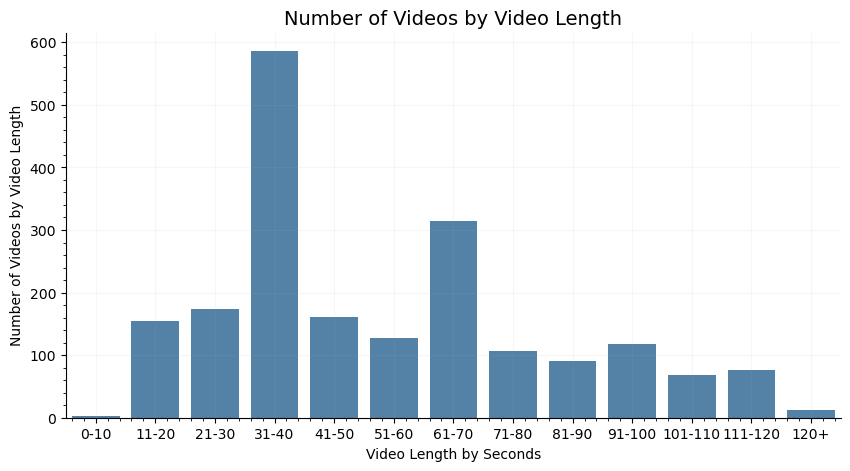

In [28]:
fig, ax =plt.subplots(figsize=(10,5), ncols=1, nrows=1)
sns.despine(top=True)
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)

ax1 = sns.countplot(x = video_final_all['Video Length'].sort_values(), color = 'steelblue')
ax1.set_title('Number of Videos by Video Length',fontsize=14)
ax1.set_xlabel('Video Length by Seconds')
ax1.set_ylabel('Number of Videos by Video Length')
plt.grid(b=True, which='major', alpha=0.1)
plt.minorticks_on()
plt.show()

In [29]:
# check how many videos for each sentiments
video_final_all['Sentiments_Abb'].value_counts()

amused         483
amazed         262
active         246
alert          178
cheerful       154
eager          128
inspired        74
alarmed         71
educated        54
persuaded       51
creative        38
calm            36
youthful        28
fashionable     25
confident       24
conscious       23
feminine        17
disturbed       16
empathetic      15
angry           14
emotional       12
afraid          10
sad              9
loving           8
manly            6
proud            4
grateful         4
jealous          1
pessimistic      1
Name: Sentiments_Abb, dtype: int64

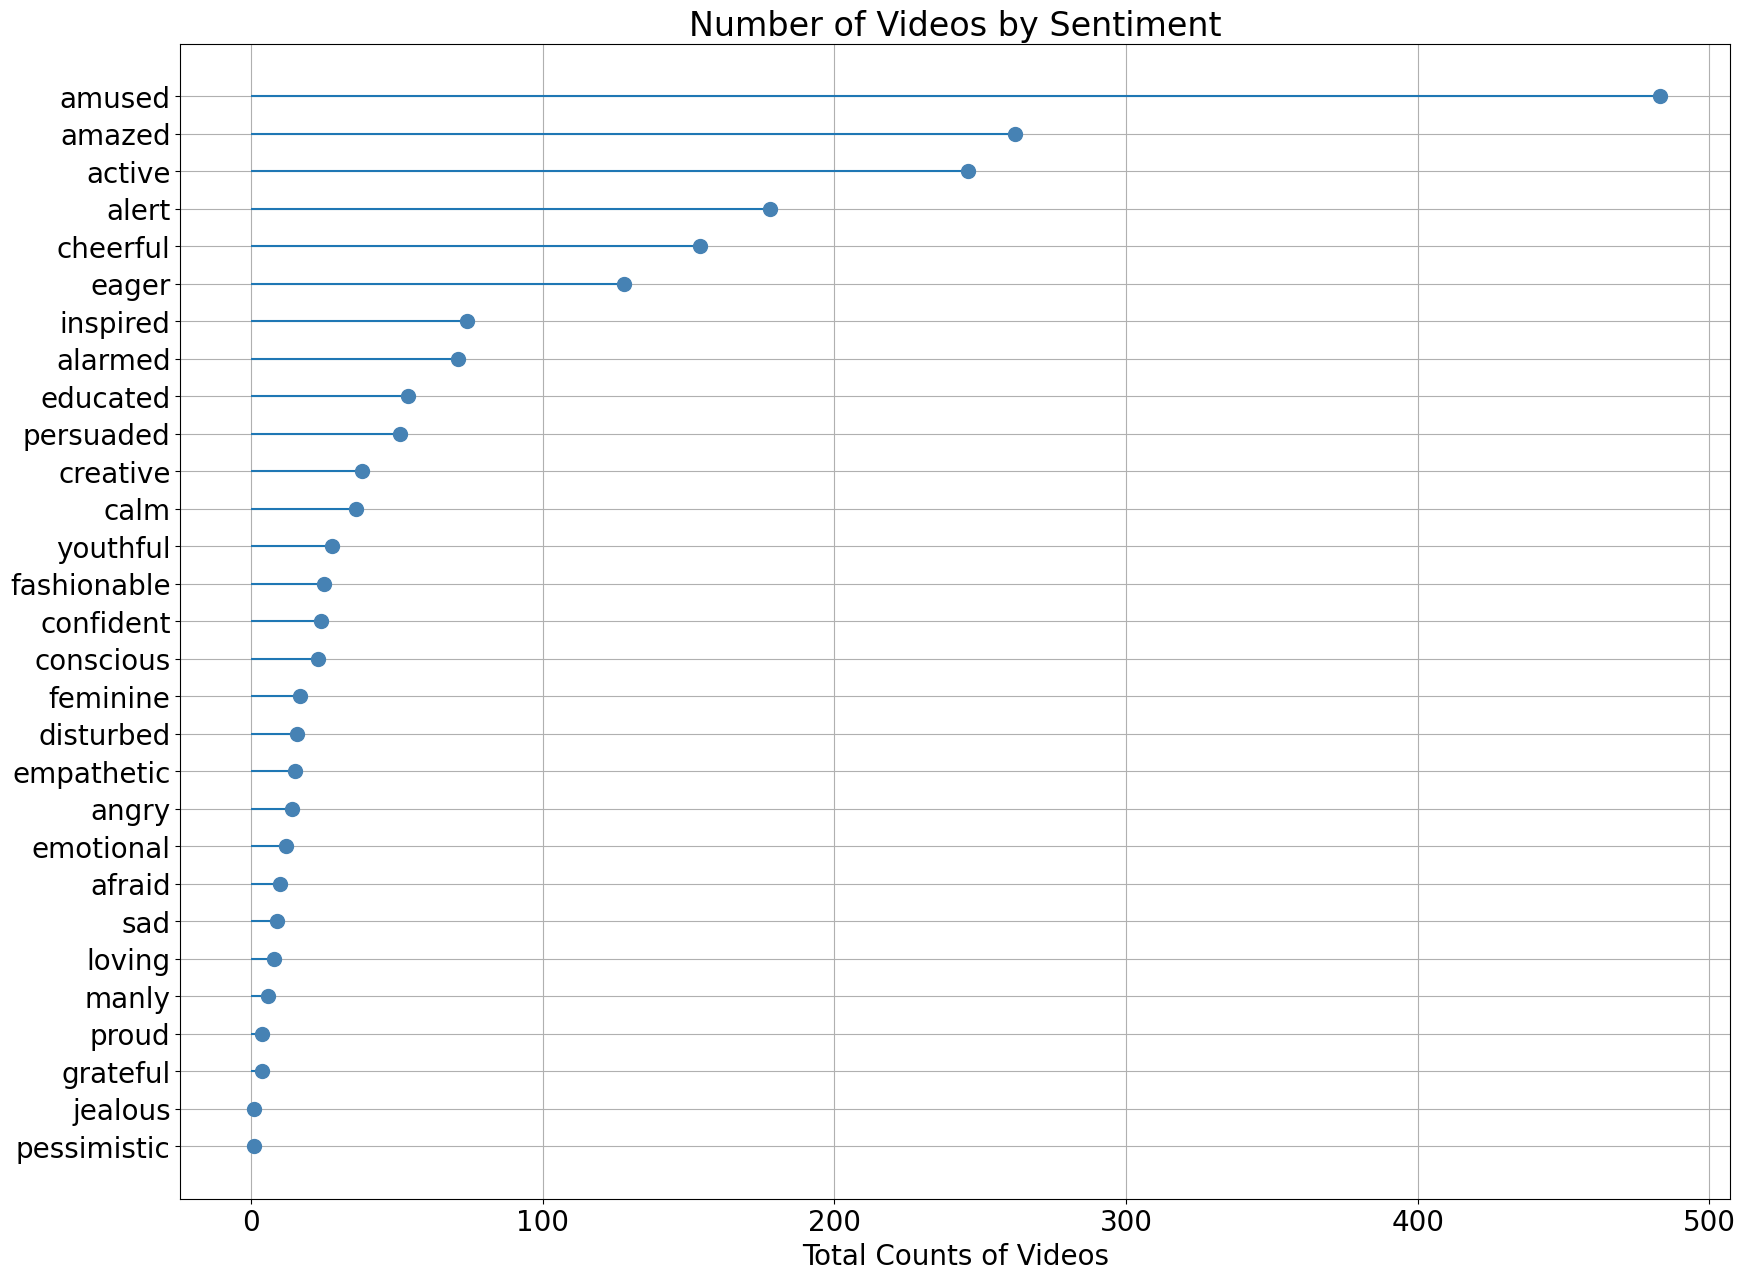

In [30]:
videos_fig2 = pd.DataFrame(video_final_all.groupby(['Sentiments_Abb'])["VideoID"].count()).reset_index().sort_values("VideoID")
plt.style.use('default')
plt.subplots(figsize=(20,15)) 

my_range = range(1,len(videos_fig2.index)+1)
plt.hlines(y=my_range, xmin=0, xmax=videos_fig2['VideoID'])
plt.plot(videos_fig2['VideoID'], my_range, "o", markersize=10, color='steelblue')
 
# Add titles and axis names
plt.yticks(my_range, videos_fig2['Sentiments_Abb'],fontsize=20)
plt.xticks(fontsize=20)
plt.title("Number of Videos by Sentiment", fontsize=24)
plt.xlabel('Total Counts of Videos',fontsize=20)
plt.grid(True)
plt.savefig('Number of Videos by Sentiment.png')
# Show the plot
plt.show()

In [33]:
prev_data_len = len(video_final_all)
train_set, test_set = train_test_split(video_final_all, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(train_set, test_size=0.2, random_state=42)
print("Previous data set ({} examples) split into {} training and {} test and {} val set examples.".format(prev_data_len, len(train_set), len(test_set), len(val_set)))

Previous data set (1992 examples) split into 1274 training and 399 test and 319 val set examples.


In [34]:
video_final_all.to_csv('./video_final_all.csv', index=False)

In [35]:
train_set["titleid"] = train_set["video_title"] + "-" + train_set["VideoID"]
test_set["titleid"] = test_set["video_title"] + "-" + test_set["VideoID"]
val_set["titleid"] = val_set["video_title"] + "-" + val_set["VideoID"]
train_set.to_csv('./train_set.csv', index=False)
test_set.to_csv('./test_set.csv', index=False)
val_set.to_csv('./val_set.csv', index=False)

In [36]:
list_video_ids = train_set['titleid']
list_video_ids_test=test_set['titleid']
list_video_ids_val=val_set['titleid']

In [ ]:
#copy videos into train, test and val folder 
src_dir = "/Users/Ad_Videos/"
dest_dir = "/Users/Train_videos"
dest_dir_test = "/Users/Test_videos"
dest_dir_val = "/Users/Val_videos"
import shutil
def copy_files(list_video_ids,src_dir,dest_dir):    
    for i in list_video_ids:
        src_video = os.path.join(src_dir+ i + ".mp4")
        shutil.copy2(src_video,dest_dir)
copy_files(list_video_ids,src_dir,dest_dir)
copy_files(list_video_ids_val,src_dir,dest_dir_val)
copy_files(list_video_ids_val,src_dir,dest_dir_val)

In [ ]:
# create a copy
train_set_n = train_set.copy()
test_set_n = test_set.copy()
val_set_n = val_set.copy()